In [1]:
%reload_ext autoreload
%autoreload 2
import slap2_py as spy
import wisco_slap as wis
import wisco_slap.defs as DEFS
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import os
import numpy as np
import matplotlib as mpl
mpl.style.use('fast')
import electro_py as epy
import cv2

In [ ]:
subject = 'alkaid'
exp = 'exp_2'
loc = 'loc_J'
acq = 'acq_1'
esum_path = wis.util.info.get_esum_mirror_path(subject, exp, loc, acq)

In [6]:
dmd = 1
fp = spy.hf.load_any(esum_path, f"/exptSummary/E[0][{dmd - 1}]['footprints']")
fpm = np.max(fp, axis=0)

In [7]:
fp = fp.swapaxes(1, 2)
fp_mask = fp>0

In [8]:
fpm = fpm.T
fpm[fpm==0] = np.nan

In [9]:
np.nanmax(fpm)

np.float32(929.9515)

In [13]:
meanim = spy.hf.load_any(esum_path, f"/exptSummary/meanIM[{dmd - 1}][0]")
img = meanim[1, :, :].T
fh = img.shape[0] / 40
fw = img.shape[1] / 40
v_min = np.nanpercentile(img, vmin)
v_max = np.nanpercentile(img, vmax)
f, ax = plt.subplots(1, 1, figsize=(fw, fh))
ax.imshow(img, vmin=v_min, vmax=v_max, cmap="viridis")
ax.set_title(f"{subject} | DMD-{dmd}, Channel-2, {exp}, {loc}, {acq}")
ax.imshow(fpm, cmap="Reds_r", vmin=0, vmax=900)

NameError: name 'vmin' is not defined

In [10]:
from ss_gui import run_selector

In [11]:
%matplotlib widget

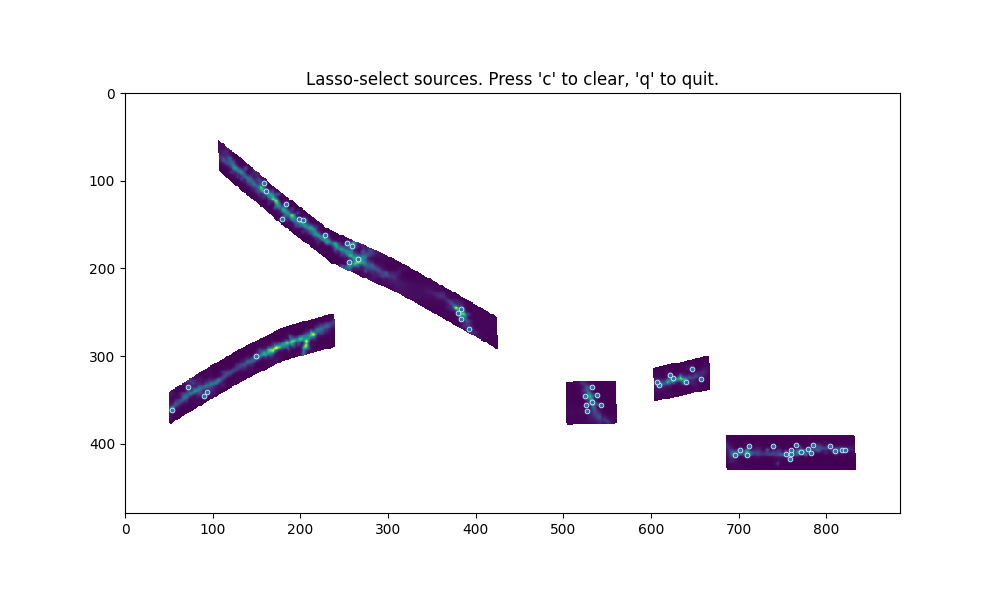

In [15]:
run_selector(img, fp_mask, output_path="selected_source_ids.txt")